In [1]:
import numpy as np
import seaborn as sns
from more_itertools import chunked
from matplotlib import pyplot as plt
from scipy.stats import kstest, norm, uniform

In [2]:
sns.set_style('whitegrid')

figsize = (12, 8)

In [ ]:
def get_quantiles(samples, k=100):
    samples = sorted(samples)
    chunks = chunked(samples, k)
    quantiles = [max(chunk) for chunk in chunks]
    return quantiles

In [3]:
size = 10000

### uniform distribution

In [4]:
u_dist = uniform(-3, 6)
u_samples = u_dist.rvs(size=size)

In [6]:
u_mean = np.mean(u_samples)
u_std = np.std(u_samples)

### normal distribution

In [7]:
n_dist = norm(u_mean, u_std)
n_samples = n_dist.rvs(size=size)

### histogram vs histogram

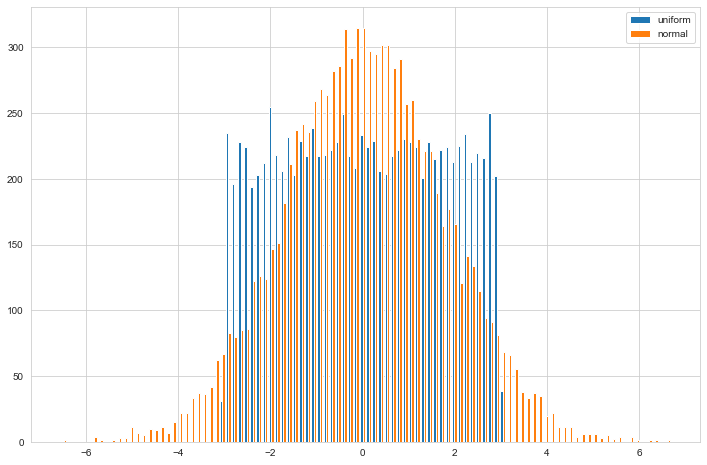

In [16]:
plt.figure(figsize=figsize)
plt.hist([u_samples, n_samples], bins=100, label=['uniform', 'normal'])
plt.legend(loc='upper right')
plt.show()

### quantiles vs quantiles

In [11]:
u_quantiles = get_quantiles(u_samples)
n_quantiles = get_quantiles(n_samples)

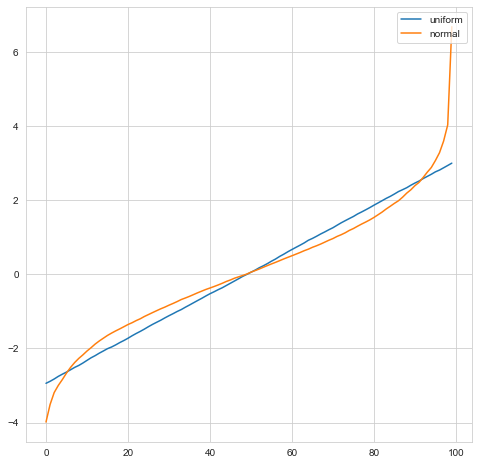

In [38]:
plt.figure(figsize=(8,8))
plt.plot(u_quantiles, label='uniform')
plt.plot(n_quantiles, label='normal')
plt.legend(loc='upper right')
plt.show()

### Kolmogorov-Smirnov test cdf vs cdf

In [33]:
u_cdfs = [i / size for i in range(1, size + 1)]
n_cdfs = [n_dist.cdf(x) for x in sorted(u_samples)]

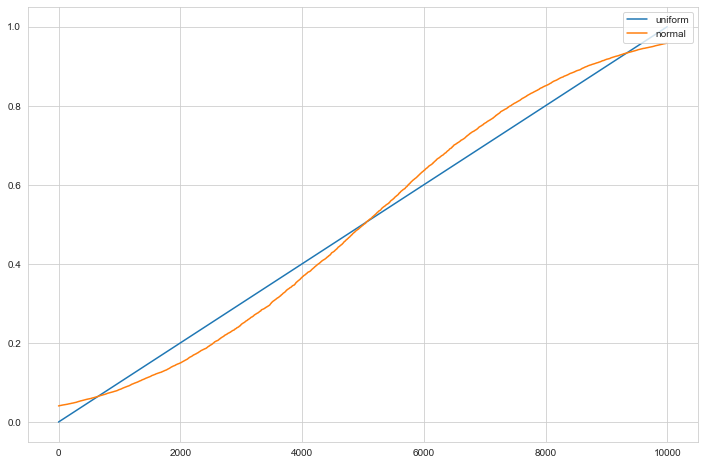

In [39]:
plt.figure(figsize=figsize)
plt.plot(u_cdfs, label='uniform')
plt.plot(n_cdfs, label='normal')
plt.legend(loc='upper right')
plt.show()

In [35]:
ks_stat = max(abs(np.array(u_cdfs) - np.array(n_cdfs)))
ks_stat

0.05857351756595042

#### comparing against KS statistic computed by scipy.stats.kstest which samples more for larger supremum

In [40]:
stat, p_value = kstest(u_samples, n_samples)
stat, p_value

(0.0632, 8.78150153827399e-18)